<a href="https://colab.research.google.com/github/sreelekaa/datacleaning-and-preprocessing/blob/main/datacleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Cleaning and Pre-processing**




Data cleaning (or data cleansing) is the process of identifying and correcting (or removing) inaccurate, incomplete, inconsistent, or irrelevant data from a dataset to improve its quality and reliability for analysis or machine learning tasks.



In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

These are Python libraries, and each has a special role in data analysis, data science, and machine learning.





In [17]:
df=pd.read_csv("Retail_Transaction_Dataset.csv")

In [18]:
print(df.head())  # Display the first 5 rows of the dataset


   CustomerID ProductID  Quantity      Price   TransactionDate PaymentMethod  \
0      109318         C         7  80.079844  12/26/2023 12:32          Cash   
1      993229         C         4  75.195229     8/5/2023 0:00          Cash   
2      579675         A         8  31.528816   3/11/2024 18:51          Cash   
3      799826         D         5  98.880218  10/27/2023 22:00        PayPal   
4      121413         A         7  93.188512  12/22/2023 11:38          Cash   

                                       StoreLocation ProductCategory  \
0            176 Andrew Cliffs\nBaileyfort, HI 93354           Books   
1  11635 William Well Suite 809\nEast Kara, MT 19483      Home Decor   
2  910 Mendez Ville Suite 909\nPort Lauraland, MO...           Books   
3  87522 Sharon Corners Suite 500\nLake Tammy, MO...           Books   
4   0070 Michelle Island Suite 143\nHoland, VA 80142     Electronics   

   DiscountApplied(%)  TotalAmount  
0           18.677100   455.862764  
1           

In [19]:
print(df.shape)  # (rows, columns)


(100000, 10)


In [20]:
print(df.dtypes)  # Data types of each column


CustomerID              int64
ProductID              object
Quantity                int64
Price                 float64
TransactionDate        object
PaymentMethod          object
StoreLocation          object
ProductCategory        object
DiscountApplied(%)    float64
TotalAmount           float64
dtype: object


In [21]:
print(df.describe())  # Basic statistics for numerical columns


          CustomerID       Quantity          Price  DiscountApplied(%)  \
count  100000.000000  100000.000000  100000.000000       100000.000000   
mean   500463.982180       5.009290      55.067344           10.020155   
std    288460.917524       2.579808      25.971567            5.779534   
min        14.000000       1.000000      10.000430            0.000046   
25%    250693.750000       3.000000      32.549474            5.001013   
50%    499679.000000       5.000000      55.116789           10.030353   
75%    751104.750000       7.000000      77.456763           15.018367   
max    999997.000000       9.000000      99.999284           19.999585   

         TotalAmount  
count  100000.000000  
mean      248.334955  
std       184.554792  
min         8.274825  
25%        95.163418  
50%       200.368393  
75%       362.009980  
max       896.141242  


In [22]:
print(df.duplicated().sum())  # Count the number of duplicate rows


0


In [23]:
print(df.isnull().sum())  # Shows number of missing values per column

CustomerID            0
ProductID             0
Quantity              0
Price                 0
TransactionDate       0
PaymentMethod         0
StoreLocation         0
ProductCategory       0
DiscountApplied(%)    0
TotalAmount           0
dtype: int64


In [24]:
df = df.dropna()  # Removes rows with missing values



In [26]:
print(df.isnull())

       CustomerID  ProductID  Quantity  Price  TransactionDate  PaymentMethod  \
0           False      False     False  False            False          False   
1           False      False     False  False            False          False   
2           False      False     False  False            False          False   
3           False      False     False  False            False          False   
4           False      False     False  False            False          False   
...           ...        ...       ...    ...              ...            ...   
99995       False      False     False  False            False          False   
99996       False      False     False  False            False          False   
99997       False      False     False  False            False          False   
99998       False      False     False  False            False          False   
99999       False      False     False  False            False          False   

       StoreLocation  Produ

In [33]:
df_encoded = pd.get_dummies(df, columns=['PaymentMethod', 'ProductCategory'])


In [34]:
print(df_encoded)


       CustomerID ProductID  Quantity      Price   TransactionDate  \
0          109318         C         7  80.079844  12/26/2023 12:32   
1          993229         C         4  75.195229     8/5/2023 0:00   
2          579675         A         8  31.528816   3/11/2024 18:51   
3          799826         D         5  98.880218  10/27/2023 22:00   
4          121413         A         7  93.188512  12/22/2023 11:38   
...           ...       ...       ...        ...               ...   
99995      726461         A         2  56.078258   7/17/2023 16:59   
99996      328056         A         6  88.516406    5/30/2023 9:04   
99997      887304         B         4  72.385564    8/25/2023 7:59   
99998      326401         C         5  66.542239    2/5/2024 19:45   
99999      771566         C         5  38.087766    2/4/2024 11:53   

       StoreLocation  DiscountApplied(%)  TotalAmount  PaymentMethod_0  \
0              15470           18.677100   455.862764             True   
1          

In [35]:
from sklearn.preprocessing import StandardScaler


In [37]:
scaler = StandardScaler()
df[['Quantity', 'Price', 'DiscountApplied(%)', 'TotalAmount']] = scaler.fit_transform(df[['Quantity', 'Price', 'DiscountApplied(%)', 'TotalAmount']])

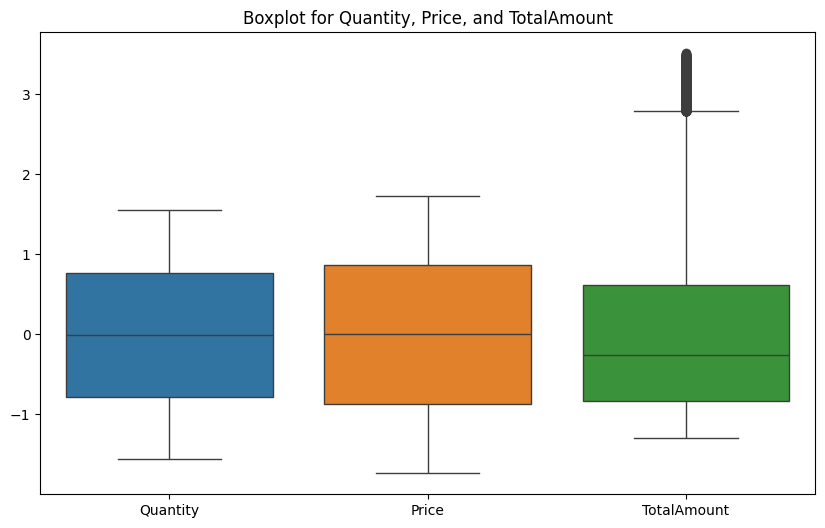

In [38]:
# Step 1: Visualize outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Quantity', 'Price', 'TotalAmount']])
plt.title('Boxplot for Quantity, Price, and TotalAmount')
plt.show()


In [39]:
# Step 2: Remove outliers using IQR method
# Calculate IQR for each feature
Q1 = df[['Quantity', 'Price', 'TotalAmount']].quantile(0.25)
Q3 = df[['Quantity', 'Price', 'TotalAmount']].quantile(0.75)
IQR = Q3 - Q1

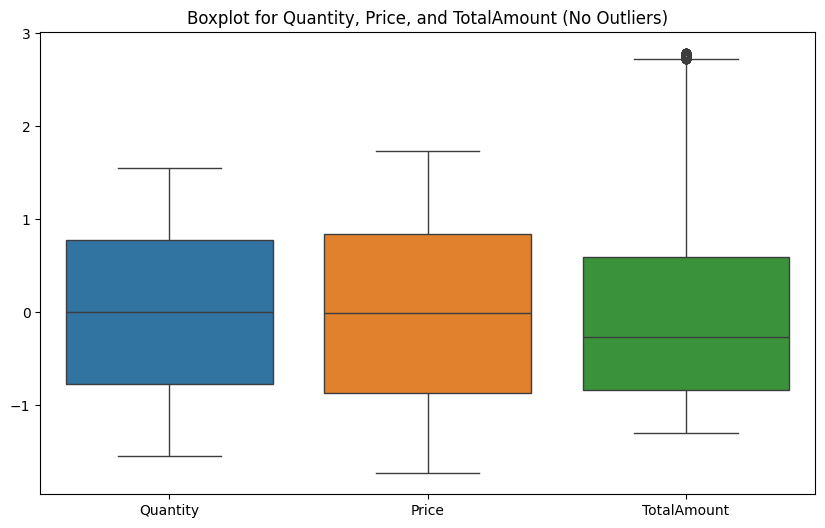

In [40]:
# Define upper and lower bounds to filter out outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with outliers
df_no_outliers = df[~((df[['Quantity', 'Price', 'TotalAmount']] < lower_bound) | (df[['Quantity', 'Price', 'TotalAmount']] > upper_bound)).any(axis=1)]

# Step 3: Visualize again after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers[['Quantity', 'Price', 'TotalAmount']])
plt.title('Boxplot for Quantity, Price, and TotalAmount (No Outliers)')
plt.show()

In [41]:
print(df_no_outliers)

       CustomerID ProductID  Quantity     Price   TransactionDate  \
0          109318         C  0.771654  0.963077  12/26/2023 12:32   
1          993229         C -0.391229  0.775001     8/5/2023 0:00   
2          579675         A  1.159282 -0.906324   3/11/2024 18:51   
3          799826         D -0.003601  1.686964  10/27/2023 22:00   
4          121413         A  0.771654  1.467811  12/22/2023 11:38   
...           ...       ...       ...       ...               ...   
99995      726461         A -1.166484  0.038924   7/17/2023 16:59   
99996      328056         A  0.384027  1.287917    5/30/2023 9:04   
99997      887304         B -0.391229  0.666818    8/25/2023 7:59   
99998      326401         C -0.003601  0.441827    2/5/2024 19:45   
99999      771566         C -0.003601 -0.653779    2/4/2024 11:53   

       PaymentMethod  StoreLocation  ProductCategory  DiscountApplied(%)  \
0                  0          15470                0            1.497870   
1                  